In [53]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([2,3])

In [5]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [6]:
G.add_node(H)

In [7]:
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e)

In [8]:
G.add_edges_from([(1,2), (1,3)])

In [9]:
G.clear()

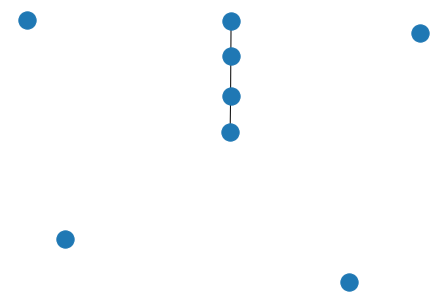

In [10]:
G.add_edges_from([(1,2), (1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")
G.add_nodes_from("spam")
G.add_edge(3, 'm')
nx.draw(G)

In [11]:
G.number_of_nodes()
G.number_of_edges()

3

In [12]:
list(G.nodes)
list(G.edges)
list(G.adj[1])
G.degree[1]

2

In [13]:
G.edges([2, 'm'])
G.degree([2,3])

DegreeView({2: 1, 3: 2})

In [14]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1,3)

In [15]:
G.add_edge(1,2)
H = nx.DiGraph(G) # create a DiGraph using the connections from G
list(H.edges())
edgelist = [(0,1), (1,2), (2,3)]
H = nx.Graph(edgelist)

In [16]:
G[1]
G[1][2]
G.edges[1,2]

{}

In [17]:
G.add_edge(1,3)
G[1][3]['color'] = "blue"
G.edges[1,2]['color'] = "red"

In [18]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125), (1,3,0.75), (2,4,1.2), (3,4,0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5:
            print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [19]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: 
        print('(%d, %d, %.3f)' %(u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


In [20]:
G = nx.Graph(day="Friday")
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [21]:
G.add_node(1, time="5pm")
G.add_nodes_from([3], time="2pm")
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [22]:
G.add_edge(1,2, weight=4.7)
G.add_edges_from([(3,4), (4,5)], color='red')
G.add_edges_from([(1,2, {'color': 'blue'}), (2,3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3,4]['weight'] = 4.2

In [23]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
list(DG.successors(1))
list(DG.predecessors(1))
list(DG.neighbors(1))

[2]

In [24]:
H = nx.Graph(G)

In [27]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,0.5), (1,2,0.75), (2,3,0.5)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight=minvalue)

nx.shortest_path(GG,1,3)

[1, 2, 3]

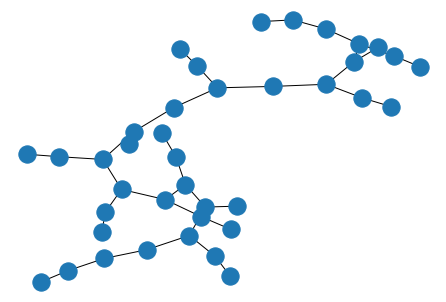

In [45]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3,5)
barbell = nx.barbell_graph(10,10)
lollipop = nx.lollipop_graph(10,2)

er = nx.erdos_renyi_graph(100,0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

nx.draw(red)

In [52]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3)])
G.add_node("spam")
list(nx.connected_components(G))
sorted(d for n, d in G.degree())
nx.clustering(G)
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

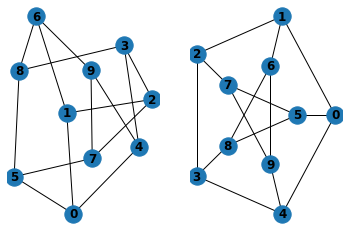

In [56]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5,10), range(5)], with_labels=True, font_weight='bold')

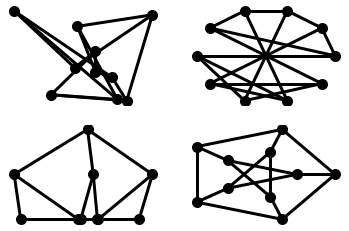

In [62]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3
}
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5,)], **options)

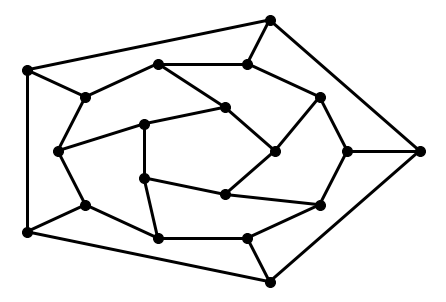

In [64]:
G = nx.dodecahedral_graph()
shells = [[2,3,4,5,6], [8,1,0,19,18,17,16,15,14,7], [9,10,11,12,13]]
nx.draw_shell(G, nlist=shells, **options)

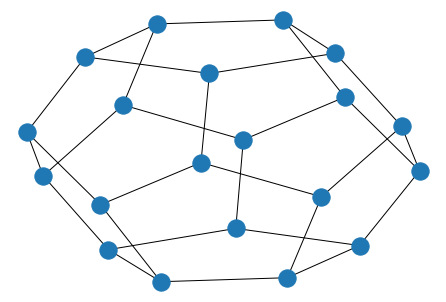

In [66]:
nx.draw(G)
plt.savefig("path.png")

### Implementation of Voronoi diagrams
After the tutorial an implementation of a Voronoi diagram is tested to see how it works and to implement its features. An implementation would be to make both households and clusters nodes in a graph and connect households with containers via edges with weight as their distance

[[0, 1, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19], [2, 3, 4, 5, 6, 15, 16, 17]]

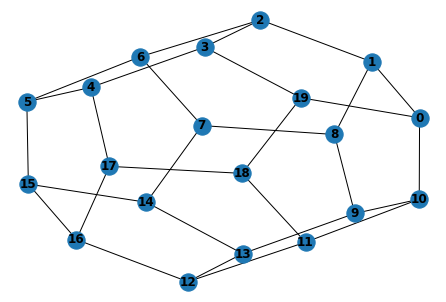

In [73]:
G = nx.dodecahedral_graph()
center_nodes = {0,3}
nx.draw(G, with_labels=True, font_weight='bold')
cells = nx.voronoi_cells(G, center_nodes)
partition = set(map(frozenset, cells.values()))
sorted(map(sorted, partition))